In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import warnings
from sklearn.model_selection import validation_curve, learning_curve
from utils import load_grades_data
import time
from sklearn.neighbors import KNeighborsClassifier

## Setup

In [63]:
X, y = load_grades_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

## Base Accuracy

This section will provide the base performance without any specific tuning

In [64]:
dt = DecisionTreeClassifier(random_state=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 85.17%


## Model Complexity Curve -  knn

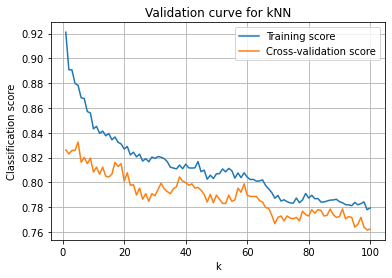

In [65]:
k_range = np.arange(1, 101)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors", 
                                             param_range=k_range, cv=5)

plt.figure()
plt.plot(k_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(k_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for kNN')
plt.xlabel('k')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_1.png')
plt.show()

## Optimal Model

In [66]:
k_optimal = np.argmax(np.mean(test_scores, axis=1)) + 1
print('Optimal value of k: %d' % k_optimal)
best_clf_knn = KNeighborsClassifier(n_neighbors=k_optimal)
t0 = time.time()
best_clf_knn.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0
print('Completed training in %f seconds' % train_time[4])
t0 = time.time()
y_pred = best_clf_knn.predict(X_test)
t1 = time.time()
test_time[4] = t1 - t0
print('Inference time on test data: %f seconds' % test_time[4])
best_accuracy[4] = accuracy_score(y_test, y_pred)
print('Accuracy of kNN with k = %d is %.2f%%' % (k_optimal, best_accuracy[4] * 100))


Optimal value of k: 5


TypeError: 'float' object does not support item assignment

## Finding Hyperparameters

In [58]:
max_depth_range = np.arange(20) + 1
param_grid = {'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth_range}
tree = GridSearchCV(dt, param_grid=param_grid, cv=5)
t0 = time.time()
dt.get_params().keys()
tree.fit(X_train, y_train)
t1 = time.time()

train_time = t1 - t0
best_dt_params = tree.best_params_

t0 = time.time()
y_pred = tree.predict(X_test)
t1 = time.time()
test_time = t1 - t0
best_accuracy = accuracy_score(y_test, y_pred)

print('Inference time on test data: %f seconds' % test_time)
print('Accuracy of decision tree is %.2f%%' % (best_accuracy * 100))
print('Completed training in %f seconds' % train_time)
print("Best parameters:")
print(best_dt_params)



Inference time on test data: 0.000409 seconds
Accuracy of decision tree is 87.70%
Completed training in 4.483142 seconds
Best parameters:
{'max_depth': 10, 'min_samples_leaf': 17}


## Learning Curve

hello


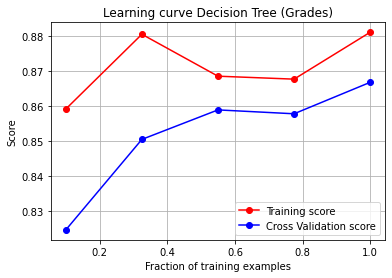

In [61]:
print('hello')
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(tree, X_train, y_train, train_sizes=train_sizes, cv=5)

train_scores = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes, train_scores, 'ro-', label='Training score')
plt.plot(train_sizes, test_scores, 'bo-', label='Cross Validation score')
plt.title('Learning curve Decision Tree (Grades)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()